Python Self-sufficiency Exam

## 1. `str_reverse`

Function that reverses a string. For example, given the string "forward", this function returns "drawrof". 

Assumption: all inputs are strings

In [1]:
# String -> String
# takes a string and reverses it
# examples
# str_reverse("facepalm book") -> "koob mlapecaf"
# str_reverse("") -> ""

def str_reverse(string):
  # avoid empty strings
  if len(string) >= 1:
    # initialize empty string 
    reversed = str("")
    for i in range(1,len(string)):
      # concatenate letters from rear of string to the empty string
      reversed = reversed + string[-i]
    # end with the first letter as it is missed out in the for loop
    reversed = reversed + string[0]
    print(reversed)
  else:
    print("Please input a valid string")

str_reverse("Thinkful Data Science Flex Program")

margorP xelF ecneicS ataD lufknihT


## 2. `bayes`

Function calculates and returns the posterior probability of an event A, given the known outcome of Event B using Bayes Theorem

In [2]:
def bayes(a, b_given_a, b_given_not_a):
    """
    Calculates P(A | B) using bayes theorem.

    Args:
        a: P(A)
        b_given_a: P(B | A)
        b_given_not_a: P(B | ~A)

    Returns:
        P(A | B)
    Using:
      P(~A) = 1 - P(A)
      P(A | B) = P (B int A)/ P(B)
               = P(B | A). P(A) / P(B)
               = P(B | A). P(A)/ ( P(B | A).P(A) + P(B | ~A).P(~A) )  
    """
    a_given_b = (b_given_a * a) / ((b_given_a * a) + (b_given_not_a * (1- a))) 
    print(a_given_b)

bayes(0.3, 0.2, 0.3)

0.2222222222222222


## 3. Analyze the teams dataset from the Lahman baseball records. This dataset contains season statistics for each Major League Baseball team.

a. For all records since 1995, plot histograms for the following variables. Which distribution do they appear to follow? Consider what each variable is measuring along with the histogram's shape.

 - Stolen bases per game
 - Wins
 - Earned run average

b. Conduct some further exploratory data analysis on this dataset. Consider qualities like distributions, correlations and trends over time. Try to find something interesting to say about the data, and use visualizations to support your argument.

In [3]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import seed
from google.colab import drive
drive.mount('/content/drive')
# We want to use the latest version of Seaborn (0.9.0) but an older version is
# installed on Colab. Run this cell only once to install the right version.
# !pip install seaborn==0.9.0

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = '/content/drive/My Drive/Thinkful DS (trial) /Data/lahman-teams.csv'

In [0]:
bb_df = pd.read_csv(path)
# bb_df.head()
# bb_df.info()

In [0]:
# new dataset with entries since 1995
bb_since1995 = bb_df.iloc[(bb_df["yearID"] > 1994).values]

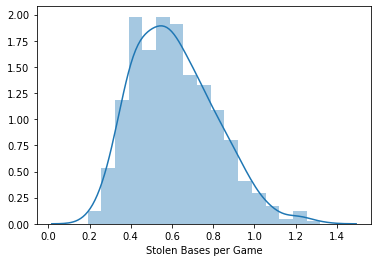

In [7]:
# Stolen bases per game
v_stolen_bases = sns.distplot(bb_since1995['SB']/bb_since1995['G'],
                    axlabel = "Stolen Bases per Game")


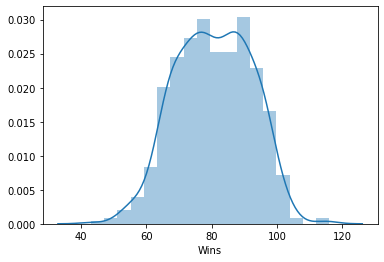

In [8]:
# Wins
v_wins = sns.distplot(bb_since1995['W'],
                    axlabel = "Wins")

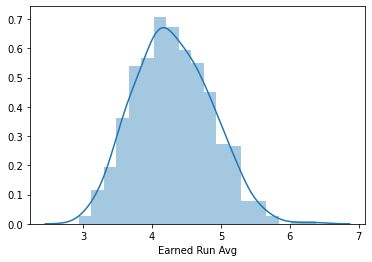

In [9]:
# Earned run average
v_era = sns.distplot(bb_since1995['ERA'],
                    axlabel = "Earned Run Avg")

## `distributions`

Any two numeric variables from the Lahman records dataset are chosen at random. For these variables, 1,000 samples are drawn and mean of 100 observations is taken each time. The frequencies of the sample means are then plotted as a Histogram.

In [10]:
# check for NaN values in dataset
(bb_df.shape[0] - bb_df.dropna().shape[0]) < bb_df.shape[0]

True

In [11]:
no_nan_bb = bb_df.dropna()

numeric_cols = no_nan_bb.select_dtypes(np.number).columns
numeric_cols = numeric_cols.drop('yearID')

TARGET_VARS = 2

cols_to_plot = []
# choose numeric cols at random
for i in range(TARGET_VARS):
  cols_to_plot.append(random.choice(numeric_cols))

# plot these variables
cols_to_plot


['W', 'attendance']

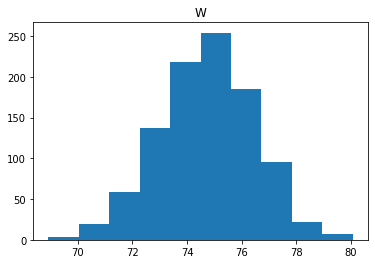

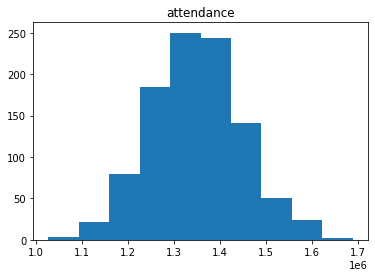

In [12]:
def plot_hists(variables, data, smpl, obs):
  '''
    Args: 
      1. variables: Variables to plot
      2. data: Data from which variables to plot
      2. smpl: Number of samples to draw
      3. obs: Number of observations in each sample
    
    Picks obs entries from the cols_to_plot and takes the mean of 
    these observations. 
    This is done smpl time after which a histogram of means
    is plotted.
  '''
  counter = 0
  # can handle more than 2 variables
  for i in range(len(variables)):
    # initialize empty list to store results
    results = []
    # draws <smpl> number of samples for each variable 
    for i in range(1, smpl):
      # choose <obs> observations of the variable each time
      sample = data[variables[counter]].sample(obs)
      # alternatively
      # sample = random.choices(population = data[variables[counter]], 
      #                        k =obs) 
      # take mean of 100 observations & append mean to existing results
      results.append(sample.mean()) #if the alt method is used - np.array(sample).mean())
    # plot histogram
    plt.hist(results)
    plt.title(cols_to_plot[counter]) #give a title
    plt.show() # display
    counter += 1 # update counter 

plot_hists(cols_to_plot, bb_df, 1000, 100)

'''
In accordance with the Central Limit Theorem, the plots follows a normal 
distribution